In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [100]:
names = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Ash Alcalinity', 'Magnesium', 'Total Phenols', \
           'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', \
           'Dilution', 'Proline']
wine_path = './wine.csv'
wine_df = pd.read_csv(wine_path, names=names)


In [101]:
# 2 classes
index_1s = wine_df['Class'] == 1
index_2s = wine_df['Class'] == 2
winedf12 = wine_df[index_1s|index_2s]
X = winedf12.drop('Class',axis=1)
y = winedf12['Class']

Its got 2 classes, 13 features, 130 samples

In [102]:
index_1s.shape

(178,)

In [103]:
X.shape

(130, 13)

Now its standardized! Notice the zero mean and unit std

In [106]:
from sklearn.preprocessing import StandardScaler
X_std = pd.DataFrame(StandardScaler().fit_transform(X), columns=names[1:])
X_std.describe()

,Alcohol,Malic Acid,Ash,Ash Alcalinity,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,Dilution,Proline
count,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02
mean,7.020026e-16,3.416071e-17,2.598349e-16,2.041102e-16,-4.457972e-16,-9.992007e-17,3.774758e-16,-3.902861e-16,-1.187085e-16,1.485991e-16,-5.961044e-16,8.770762e-16,-4.440892e-17
std,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00
min,-2.161957e+00,-1.400991e+00,-3.312182e+00,-2.416453e+00,-1.951429e+00,-2.618653e+00,-2.612521e+00,-1.842617e+00,-2.497495e+00,-1.799777e+00,-2.195268e+00,-2.882492e+00,-1.458310e+00
25%,-8.093764e-01,-5.225744e-01,-5.758509e-01,-6.673009e-01,-7.766557e-01,-6.905910e-01,-6.633354e-01,-6.462964e-01,-6.137474e-01,-8.226336e-01,-7.075249e-01,-4.687685e-01,-9.001514e-01
50%,7.446037e-02,-2.715983e-01,-6.912290e-02,-6.948922e-02,-1.240038e-01,6.866973e-02,1.020516e-01,-2.781977e-01,-8.815866e-02,-2.005346e-01,-5.291788e-02,5.411680e-02,-2.109963e-01
75%,8.848793e-01,1.020139e-01,6.318509e-01,6.390283e-01,5.286480e-01,7.635083e-01,6.905492e-01,6.190429e-01,4.699887e-01,7.287547e-01,6.463214e-01,7.301706e-01,7.793083e-01
max,2.130157e+00,4.371460e+00,3.005027e+00,3.310730e+00,4.052968e+00,2.498304e+00,3.524182e+00,3.034691e+00,3.400262e+00,2.905329e+00,3.874724e+00,2.209038e+00,2.534233e+00


In [107]:
# source: http://stackoverflow.com/questions/22943894/class-labels-in-pandas-scattermatrix
def factor_scatter_matrix(df, factor, palette=None, figsize=(10,10), labelpad=50, ax=None):
    '''Create a scatter matrix of the variables in df, with differently colored
    points depending on the value of df[factor].
    inputs:
        df: pandas.DataFrame containing the columns to be plotted, as well 
            as factor.
        factor: string or pandas.Series. The column indicating which group 
            each row belongs to.
        palette: A list of hex codes, at least as long as the number of groups.
            If omitted, a predefined palette will be used, but it only includes
            9 groups.
    '''
    import matplotlib.colors
    import numpy as np
    from pandas.tools.plotting import scatter_matrix
    from scipy.stats import gaussian_kde
    from textwrap import wrap

    if isinstance(factor, str):
        factor_name = factor #save off the name
        factor = df[factor] #extract column
        df = df.drop(factor_name,axis=1) # remove from df, so it 
        # doesn't get a row and col in the plot.

    classes = list(set(factor))

    if palette is None:
        palette = ['#e41a1c', '#377eb8', '#4eae4b', 
                   '#994fa1', '#ff8101', '#fdfc33', 
                   '#a8572c', '#f482be', '#999999']

    color_map = dict(zip(classes,palette))

    if len(classes) > len(palette):
        raise ValueError('''Too many groups for the number of colors provided.
We only have {} colors in the palette, but you have {}
groups.'''.format(len(palette), len(classes)))

    colors = factor.apply(lambda group: color_map[group])
    axarr = scatter_matrix(df,figsize=figsize,marker='o',c=colors,diagonal=None, ax=ax)

    for rc in range(len(df.columns)):
        for group in classes:
            y = df[factor == group].iloc[:,rc].values
            gkde = gaussian_kde(y)
            ind = np.linspace(y.min(), y.max(), 1000)
            axarr[rc][rc].plot(ind, gkde.evaluate(ind),c=color_map[group])
    
    # Hide tickmarks/ticklabels, and rotate labels
    for i, axs in enumerate(axarr):
        for j, ax in enumerate(axs):
            ax.xaxis.set_ticklabels([])
            ax.yaxis.set_ticklabels([])
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_ticks_position('none')
            # to make x axis name vertical  
            ax.xaxis.label.set_rotation(90)
            # to make y axis name horizontal 
            ax.yaxis.label.set_rotation(0)
            # to make sure y axis names are outside the plot area
            ax.yaxis.labelpad = labelpad
            ax.xaxis.label.set_text('\n'.join(ax.xaxis.label.get_text().split(' ')))
            ax.yaxis.label.set_text('\n'.join(ax.yaxis.label.get_text().split(' ')))

    return axarr

## Visualization
Now lets take a look at the feature space

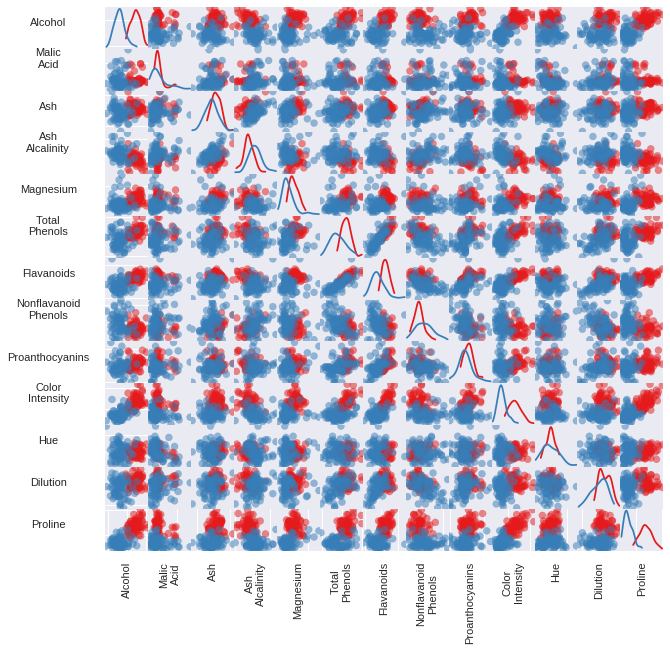

In [108]:
wine_df_std = X_std
wine_df_std['Class'] = y
axarr = factor_scatter_matrix(wine_df_std,'Class')

In [109]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## PCA Time
Lets get to fitting a PCA model to the data

In [110]:
X_std.describe()

,Alcohol,Malic Acid,Ash,Ash Alcalinity,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,Dilution,Proline,Class
count,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,130.000000
mean,7.020026e-16,3.416071e-17,2.598349e-16,2.041102e-16,-4.457972e-16,-9.992007e-17,3.774758e-16,-3.902861e-16,-1.187085e-16,1.485991e-16,-5.961044e-16,8.770762e-16,-4.440892e-17,1.546154
std,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,0.499791
min,-2.161957e+00,-1.400991e+00,-3.312182e+00,-2.416453e+00,-1.951429e+00,-2.618653e+00,-2.612521e+00,-1.842617e+00,-2.497495e+00,-1.799777e+00,-2.195268e+00,-2.882492e+00,-1.458310e+00,1.000000
25%,-8.093764e-01,-5.225744e-01,-5.758509e-01,-6.673009e-01,-7.766557e-01,-6.905910e-01,-6.633354e-01,-6.462964e-01,-6.137474e-01,-8.226336e-01,-7.075249e-01,-4.687685e-01,-9.001514e-01,1.000000
50%,7.446037e-02,-2.715983e-01,-6.912290e-02,-6.948922e-02,-1.240038e-01,6.866973e-02,1.020516e-01,-2.781977e-01,-8.815866e-02,-2.005346e-01,-5.291788e-02,5.411680e-02,-2.109963e-01,2.000000
75%,8.848793e-01,1.020139e-01,6.318509e-01,6.390283e-01,5.286480e-01,7.635083e-01,6.905492e-01,6.190429e-01,4.699887e-01,7.287547e-01,6.463214e-01,7.301706e-01,7.793083e-01,2.000000
max,2.130157e+00,4.371460e+00,3.005027e+00,3.310730e+00,4.052968e+00,2.498304e+00,3.524182e+00,3.034691e+00,3.400262e+00,2.905329e+00,3.874724e+00,2.209038e+00,2.534233e+00,2.000000


(13, 14)
[4.9746983159876343, 1.8207111697712279, 1.5264854238606775, 1.2037605666770128, 0.87193645865543856, 0.73494357883134165, 0.61289148567954266, 0.43280006702356399, 0.37272730553772926, 0.29763729894947633, 0.20032975003884818, 0.19237692826604838, 0.078079972016062607, 0.031188166481191187]


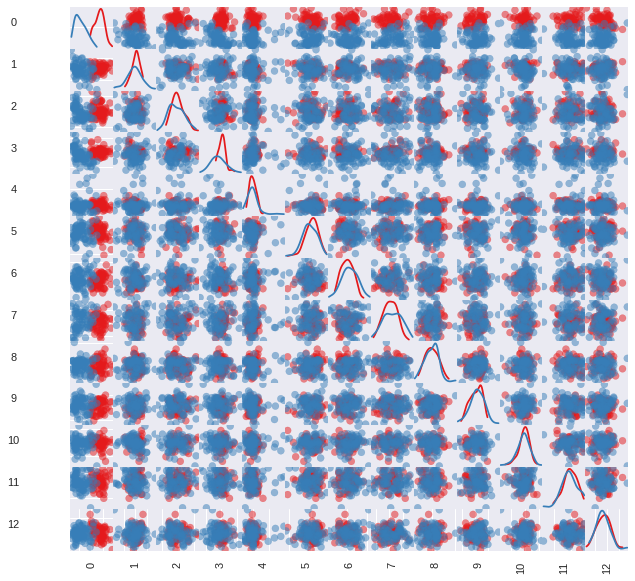

In [153]:
#my PCA
# 0. standardize the data
# 1. obtain the eigenvectors and eigenvalues from covariance matrix
#    or correlation matrix, or perform Singular Vector Decomposition
# 2. Sort eignevalues in decreasing order and choose K eigenvectors
#    that corresponding to k largest eigenvaluves
# 3. Construct the projection matrix W
# 4. Transform X to X_pca using the W
import numpy as np

# part 1
X_np = X_std.as_matrix()
X_mu = np.mean(X_np, axis = 0)
X_sigma = np.cov(X_np.T)

# get eigenvactors and eigenvalues
import numpy.linalg as LA
eig_val, eig_vec = LA.eig(X_sigma)
#print('Eigenvectors:', eig_vec)
#print('Eigenvalues:', eig_val)

X_std.shape

# Singular Vector Decomposition -- SVD
U, s, V = LA.svd(X_np.T, full_matrices = True)
U.shape, s.shape, V.shape

# part 2 select topK values
pairs = [[eig_val[i], eig_vec[:, i]] for i in range(eig_val.shape[0])]
pairs = sorted(pairs, key = lambda row : row[0], reverse = True)

#print('eigenvalues:', [row[1] for row in pairs])

# part 3 construct projection matrix W (to dimension k)
k = 13
# recover all the eig_vecs
eig_vecs_sorted = [row[1] for row in pairs]
W = eig_vecs_sorted[0:k]
W = np.matrix(W)

print W.shape

print([row[0] for row in pairs])

X_pca = X_np.dot(W.T)

wine_my_pca = pd.DataFrame(X_pca)

wine_my_pca = pd.DataFrame(X_pca)
wine_my_pca['Class'] = wine_df['Class']
axarr = factor_scatter_matrix(wine_my_pca,'Class')

In [112]:
# provided PCA tool
from sklearn.decomposition import PCA

pca = PCA(n_components=13)
pca.fit(X_std)
X_std_pca = pca.transform(X_std)
print('X_std_pca.shape:', X_std_pca.shape)
print('pca.components_:', pca.components_.shape)

('X_std_pca.shape:', (130, 13))
('pca.components_:', (13, 14))


In [114]:
eig_vecs_sorted2 = np.matrix(eig_vecs_sorted)

In [117]:
# reconstruction error
projection = X_np * eig_vecs_sorted2.T
reconstruction = projection * eig_vecs_sorted2

In [118]:
X_np

array([[ 1.4525, -0.2944,  0.3025, ...,  2.04  ,  0.7829,  1.    ],
       [ 0.2891, -0.2146, -0.6772, ...,  0.9414,  0.7402,  1.    ],
       [ 0.2439,  0.4471,  1.1132, ...,  0.4555,  1.1246,  1.    ],
       ..., 
       [-1.3035,  0.1847,  1.4848, ..., -1.0867, -0.9229,  2.    ],
       [-0.6484, -0.3857, -0.1367, ..., -0.3684, -1.2761,  2.    ],
       [-1.0212,  2.6603,  0.1336, ..., -0.8121, -0.5983,  2.    ]])

In [119]:
reconstruction

matrix([[ 1.4525, -0.2944,  0.3025, ...,  2.04  ,  0.7829,  1.    ],
        [ 0.2891, -0.2146, -0.6772, ...,  0.9414,  0.7402,  1.    ],
        [ 0.2439,  0.4471,  1.1132, ...,  0.4555,  1.1246,  1.    ],
        ..., 
        [-1.3035,  0.1847,  1.4848, ..., -1.0867, -0.9229,  2.    ],
        [-0.6484, -0.3857, -0.1367, ..., -0.3684, -1.2761,  2.    ],
        [-1.0212,  2.6603,  0.1336, ..., -0.8121, -0.5983,  2.    ]])

In [122]:
# reconstruction error
from scipy import linalg as LA
recon_error = np.square(X_np - reconstruction)
reconE = np.sum(recon_error)
print "the PCA reconstruction error (using all eigenvectors) is", reconE

the PCA reconstruction error (using all eigenvectors) is 4.51699729113e-27


Now lets look at the new projected data

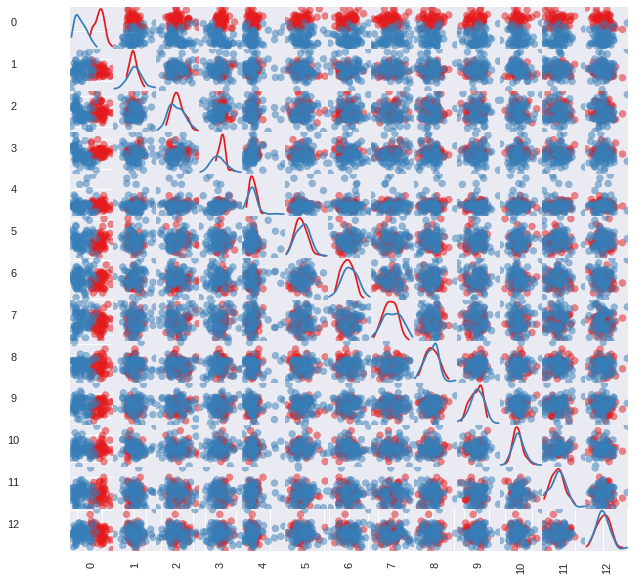

In [15]:
wine_df3_pca = pd.DataFrame(X_std_pca)
wine_df3_pca['Class'] = wine_df['Class']
axarr = factor_scatter_matrix(wine_df3_pca,'Class')

Lets focus on the first few dimensions with the largest eigenvectors

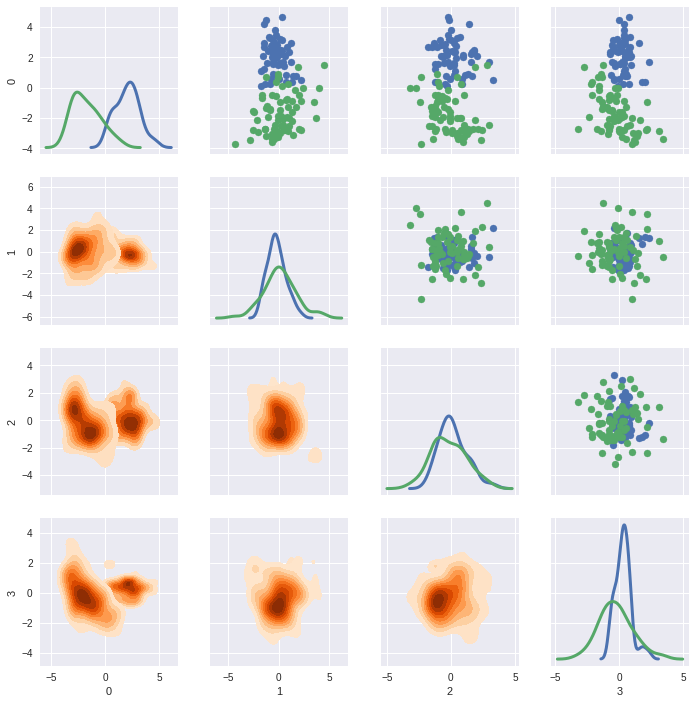

In [16]:
wine_df4_pca = wine_df3_pca[['Class', 0, 1, 2, 3]]

vars = wine_df4_pca.drop('Class', 1).columns
g = sns.PairGrid(wine_df4_pca, hue="Class", vars=vars)
g.map_lower(sns.kdeplot, cmap="Oranges", shade=True, shade_lowest=False)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3, legend=False);

Looks like $0$ and $1$ are useful, but the rest are just about useless

# LDA
## [Linear Discriminant Analysis](https://en.wikipedia.org/wiki/Linear_discriminant_analysis)

In [17]:
X_std

,Alcohol,Malic Acid,Ash,Ash Alcalinity,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,Dilution,Proline,Class
0,1.452455,-0.294414,0.302478,-0.940375,1.768686,0.510421,0.775592,-0.462247,1.000229,0.892384,-0.112428,2.040025,0.782868,1
1,0.289066,-0.214558,-0.677197,-2.239324,0.006527,0.234327,0.367386,-0.646296,-0.878867,0.114374,-0.052918,0.941437,0.740152,1
2,0.243886,0.447106,1.113242,-0.054728,0.071792,0.510421,1.020516,-0.278198,1.967684,0.917082,-0.171937,0.455524,1.124598,1
3,1.610586,-0.020622,0.538951,-0.586117,0.854974,2.443085,1.360688,-0.830346,0.795575,2.226115,-1.183603,1.047071,1.964684,1
4,0.334246,0.709490,1.788880,0.653789,1.181300,0.510421,0.272138,0.550024,0.125798,0.077326,-0.112428,-0.051517,-0.156889,1
5,1.418570,-0.237374,0.370041,-1.058462,0.789709,1.375518,1.224619,0.089901,0.404872,1.577773,-0.052918,-0.220530,1.879251,1
6,1.633176,-0.111886,0.370041,-1.235591,-0.254534,-0.041768,0.040821,-0.278198,0.423476,0.651571,-0.231447,1.321718,1.423611,1
7,1.260439,0.207538,0.910551,-0.349944,1.377095,0.142295,0.027214,-0.186173,-0.934682,0.528078,0.006592,1.321718,1.437850,1
8,2.130157,-0.374270,-0.575851,-1.412720,-0.189269,0.510421,0.666737,-0.370222,0.423476,0.620698,0.125611,-0.220530,0.725913,1
9,1.034539,-0.705103,-0.238032,-0.822289,-0.124004,0.841735,0.898054,-1.014395,0.181613,1.867983,-0.290957,1.258338,0.725913,1


In [167]:
# My LDA
# problem: 
# 1. compute d-dimensional mean vector for the different classes
# 2. Compute the scatter matrices (in-between-class and within-class)
# 3. Compute eigencector and eigenvalues for the scatter matrices
# 4. Sort by eigenvalues, choose k eigenvectors form W
# 5.  
# Not use X_std
# Part 0 nomalize first
from sklearn.preprocessing import StandardScaler
X_std2 = pd.DataFrame(StandardScaler().fit_transform(X), columns=names[1:])
# Part 1 compuate mean

num_class = 2
di = X_std2.shape[1]
X_means = []
X_cls = []
for i in range(1, num_class + 1):
    tempi = X_std2[y == i].as_matrix()
    X_cls.append(tempi)
    X_means.append(np.mean(tempi, axis = 0))

# Part 2 compute Scatter Matrix Sw
Sw = np.zeros([di,di])
for i in range(0, num_class):
    Sw += (len(X_cls[i])-1)*np.cov(X_cls[i].T)

mean_all = np.mean(X_std2, axis = 0)
mean_all = mean_all.values.reshape(di,1)

In [168]:
mean_all

array([[  7.0200e-16],
       [  3.4161e-17],
       [  2.5983e-16],
       [  2.0411e-16],
       [ -4.4580e-16],
       [ -9.9920e-17],
       [  3.7748e-16],
       [ -3.9029e-16],
       [ -1.1871e-16],
       [  1.4860e-16],
       [ -5.9610e-16],
       [  8.7708e-16],
       [ -4.4409e-17]])

the calculation is OK
6.24730653599
3.74514553977e-16
2.3758148238e-16
2.3758148238e-16
7.74205078964e-18
-2.18174680419e-18
-2.18174680419e-18
-5.42461898769e-18
-1.60631532617e-16
-1.60631532617e-16
-1.82517940463e-16
-1.82517940463e-16
-4.7663091923e-16
[[ 0.4687]
 [ 0.1076]
 [ 0.3256]
 [-0.3702]
 [ 0.0025]
 [-0.1217]
 [ 0.1364]
 [-0.0235]
 [-0.0715]
 [ 0.0439]
 [-0.0205]
 [ 0.2367]
 [ 0.6544]]


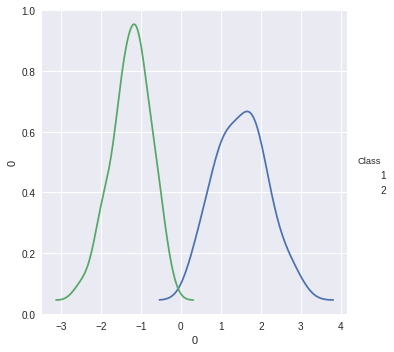

In [169]:
Sb = np.zeros((di, di))
for i in range(0, num_class):
    meani = X_means[i]
    meani = meani.reshape(di, 1)
    Sb += len(X_cls[i]) * (meani - mean_all).dot((meani - mean_all).T)
    
Sb.shape

# part solving eigenvec and eigenval for Sw^-1 Sb
eig_val, eig_vec = LA.eig(LA.inv(Sw).dot(Sb))
eig_val = eig_val.real
eig_vec = eig_vec.real

# check the correction
for i in range(len(eig_val)):
    v = eig_vec[:, i].reshape(di, 1)
    np.testing.assert_array_almost_equal(LA.inv(Sw).dot(Sb).dot(v),
                                        eig_val[i] * v, decimal = 6
                                       ,err_msg = '', verbose=True)
print('the calculation is OK')

# Part 4 rank and select
pairs = [[eig_val[i], eig_vec[:, i]] for i in range(len(eig_val))]
pairs = sorted(pairs, key = lambda row : row[0], reverse = True)

for row in pairs:
    print(row[0])

# recover the eig vectors
k = 1
# recover all the eig_vecs
eig_vecs_sorted = [row[1] for row in pairs]
W = eig_vecs_sorted[0:k]
W = np.matrix(W)

print W.T

X_mat = X_std2.as_matrix()
X_mat.shape

# Part 5 transform
X_my_lda = np.dot(X_mat, W.T)

# the result
wine_my_lda = pd.DataFrame(X_my_lda)
wine_my_lda['Class'] = wine_df['Class']
vars = wine_my_lda.drop('Class', 1).columns
g = sns.pairplot(wine_my_lda, hue="Class", diag_kind="kde", vars=vars, size=5)

In [91]:
# original
warnings.filterwarnings('default')

In [144]:
eig_vecs_sorted2 = np.matrix(eig_vecs_sorted)

In [149]:
# reconstruction error
projection = X_mat * eig_vecs_sorted2.T
reconstruction = projection * eig_vecs_sorted2

In [151]:
# reconstruction error
from scipy import linalg as LA
recon_error = np.square(X_mat - reconstruction)
reconE = np.sum(recon_error)
print "the LDA reconstruction error is", reconE

the LDA reconstruction error is 1177.33156035


In [124]:
X_mat

array([[ 1.4525, -0.2944,  0.3025, ..., -0.1124,  2.04  ,  0.7829],
       [ 0.2891, -0.2146, -0.6772, ..., -0.0529,  0.9414,  0.7402],
       [ 0.2439,  0.4471,  1.1132, ..., -0.1719,  0.4555,  1.1246],
       ..., 
       [-1.3035,  0.1847,  1.4848, ..., -0.529 , -1.0867, -0.9229],
       [-0.6484, -0.3857, -0.1367, ..., -1.0051, -0.3684, -1.2761],
       [-1.0212,  2.6603,  0.1336, ..., -1.6002, -0.8121, -0.5983]])

In [97]:
reconstruction

matrix([[  0.9301,  -3.06  ,   1.4947, ...,  -0.1236,   1.1962,   1.3221],
        [  0.7262,  -0.5058,   1.0746, ...,  -0.2075,   0.8201,   0.6167],
        [  0.4504,   1.7187,   0.3093, ...,  -0.1764,   0.2666,   0.7613],
        ..., 
        [ -1.0099,  -1.0599,  -0.8851, ...,  -0.5525,  -0.661 ,  -0.9874],
        [ -0.818 ,  -3.2661,  -0.3635, ...,  -1.126 ,  -0.2576,  -0.8787],
        [ -0.9002,  18.0881,  -2.5733, ...,  -1.8803,  -1.932 ,  -2.4304]])

In [152]:
W[0] # the most important eigenvector

matrix([[ 0.4687,  0.1076,  0.3256, -0.3702,  0.0025, -0.1217,  0.1364,
         -0.0235, -0.0715,  0.0439, -0.0205,  0.2367,  0.6544]])

In [22]:
warnings.filterwarnings('ignore')

Now lets compare the result with numpy.linalg **LDA**

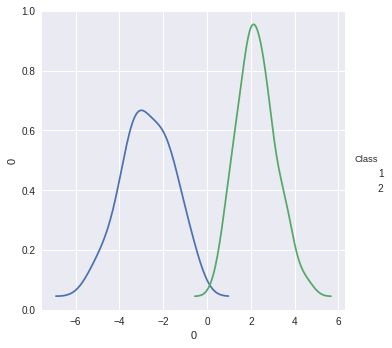

In [23]:
wine_df_lda = pd.DataFrame(X_std_lda)
wine_df_lda['Class'] = wine_df['Class']
vars = wine_df_lda.drop('Class', 1).columns
g = sns.pairplot(wine_df_lda, hue="Class", diag_kind="kde", vars=vars, size=5)

Lets compare that data with the subspace from **PCA**

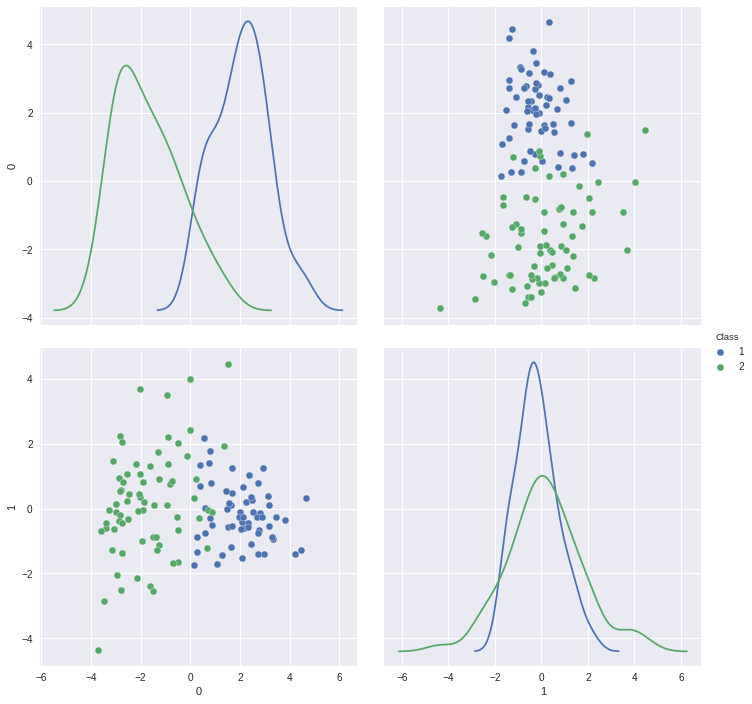

In [24]:
wine_df4_pca = wine_df3_pca[[0, 1, 'Class']]
vars = wine_df4_pca.drop('Class', 1).columns

g = sns.pairplot(wine_df4_pca, hue="Class", diag_kind="kde", vars=vars, size=5)

We can see that the 2 classes distribution of LDA projected data has less overlap with each other. And the overlap means that region that the classifiers may make confusions.   

In [175]:
X_lda = projection = X_mat * eig_vecs_sorted2[0].T
print X_lda

[[ 2.12  ]
 [ 1.5338]
 [ 1.3759]
 [ 2.6539]
 [ 0.4204]
 [ 2.3702]
 [ 2.5954]
 [ 2.3771]
 [ 1.7479]
 [ 1.5275]
 [ 2.1447]
 [ 1.7109]
 [ 1.7977]
 [ 2.286 ]
 [ 2.9267]
 [ 1.9535]
 [ 1.8434]
 [ 1.1576]
 [ 2.7914]
 [ 1.5926]
 [ 1.1789]
 [ 0.8332]
 [ 1.6893]
 [ 0.9968]
 [ 0.9913]
 [ 0.489 ]
 [ 1.7806]
 [ 0.9981]
 [ 1.3457]
 [ 1.4115]
 [ 1.1327]
 [ 1.7222]
 [ 0.8797]
 [ 1.5297]
 [ 1.2019]
 [ 0.7324]
 [ 1.2033]
 [ 0.7471]
 [ 0.4885]
 [ 1.9819]
 [ 0.7617]
 [ 0.8312]
 [ 2.178 ]
 [ 0.3546]
 [ 0.3447]
 [ 1.8326]
 [ 1.8923]
 [ 1.1659]
 [ 1.0842]
 [ 1.7155]
 [ 1.0967]
 [ 2.0581]
 [ 1.9453]
 [ 2.0608]
 [ 1.339 ]
 [ 0.8529]
 [ 1.3808]
 [ 1.706 ]
 [ 1.7354]
 [-1.7933]
 [-1.1298]
 [-1.616 ]
 [-0.5557]
 [-1.4664]
 [-1.4677]
 [-0.6216]
 [-0.755 ]
 [-1.1011]
 [-0.4013]
 [-1.1803]
 [-1.0645]
 [-0.5712]
 [-0.9816]
 [-0.4646]
 [-0.8668]
 [-1.8512]
 [-1.3598]
 [-1.245 ]
 [-0.9694]
 [-0.978 ]
 [-1.9555]
 [-0.2732]
 [-1.4677]
 [-1.099 ]
 [-0.8426]
 [-0.8701]
 [-1.8886]
 [-1.5704]
 [-1.195 ]
 [-1.4238]
 [-1.4435]

In [176]:
pred = X_lda
pred[pred > 0] = 1
pred[pred <= 0] = 2

In [178]:
# use LDA to classify
from sklearn.metrics import confusion_matrix
import pylab as pl
accuracy = confusion_matrix(y,pred)
print "confusion_matrix for wine set"
print accuracy

confusion_matrix for wine set
[[59  0]
 [ 0 71]]


Confusion matrix, without normalization
[[59  0]
 [ 0 71]]
Normalized confusion matrix
[[ 1.  0.]
 [ 0.  1.]]


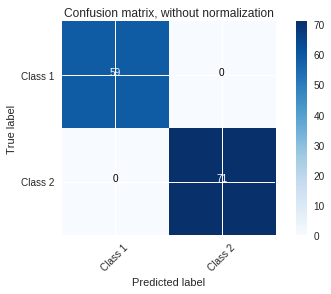

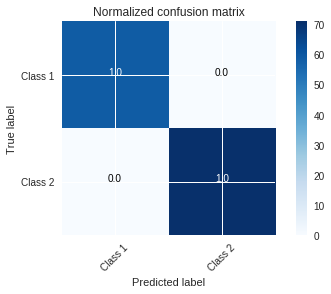

In [179]:
labels = ['Class 1', 'Class 2']
#labels = ['Class 3', 'Class 5']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(accuracy, classes=labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(accuracy, classes=labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Normalized confusion matrix
[[ 1.  0.]
 [ 0.  1.]]


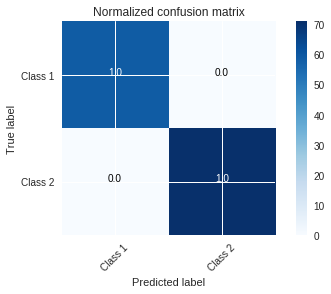

In [180]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(accuracy, classes=labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()